In [71]:
# require imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, f1_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
import seaborn as sns

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image

%matplotlib inline

In [72]:
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/MyDrive/PIMA/



/content/drive/MyDrive/PIMA


In [8]:
!pwd

/content/drive/MyDrive/PIMA


In [9]:
# loading and reading the dataset
df = pd.read_csv('diabetes.csv')

In [11]:
# head of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
# shape of the data
df.shape

(768, 9)

In [14]:
# checking for null values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [15]:
# distribution of Outcome variable
df['Outcome'].value_counts(normalize=True)

,proportion
Outcome,
0,0.651042
1,0.348958


In [16]:
# descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
# # let's consider only 3 independent variables with target variable
# df = df[['Age', 'BloodPressure', 'BMI', 'Outcome']]

In [18]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [19]:
# extracting dependent and independent variable
y = df['Outcome']
X = df.drop(columns=['Outcome'], axis=1)

In [20]:
# train/test split of the data

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=47)

# the OOB (Out of bag is same as test data set; but then it changes every time, we resample (bootrap)) is 25% of samples

In [21]:
# shape of train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

### **Random Forest Classifier**

In [22]:
# Random Forest (RF) model fitting
rf_clf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf_clf = rf_clf.fit(X_train, y_train)

In [23]:
print('The training accuracy of the model: ', round(accuracy_score(y_train, rf_clf.predict(X_train)), 4))
print('The training recall of the model: ', round(recall_score(y_train, rf_clf.predict(X_train)), 4))
print('The training precision of the model: ', round(precision_score(y_train, rf_clf.predict(X_train)), 4))
print('The training f1_score of the model: ', round(f1_score(y_train, rf_clf.predict(X_train)), 4))

The training accuracy of the model:  1.0
The training recall of the model:  1.0
The training precision of the model:  1.0
The training f1_score of the model:  1.0


In [24]:
print('The test accuracy of the model: ', round(accuracy_score(y_test, rf_clf.predict(X_test)), 4))
print('The test recall of the model: ', round(recall_score(y_test, rf_clf.predict(X_test)), 4))
print('The test precision of the model: ', round(precision_score(y_test, rf_clf.predict(X_test)), 4))
print('The test f1_score of the model: ', round(f1_score(y_test, rf_clf.predict(X_test)), 4))

The test accuracy of the model:  0.7344
The test recall of the model:  0.4769
The test precision of the model:  0.6458
The test f1_score of the model:  0.5487


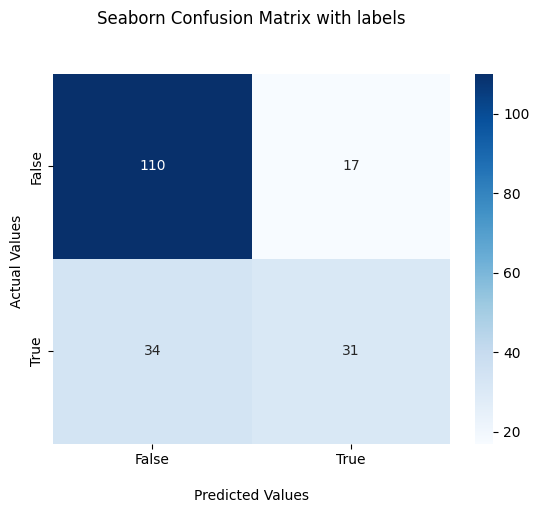

In [56]:

y_pred = rf_clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

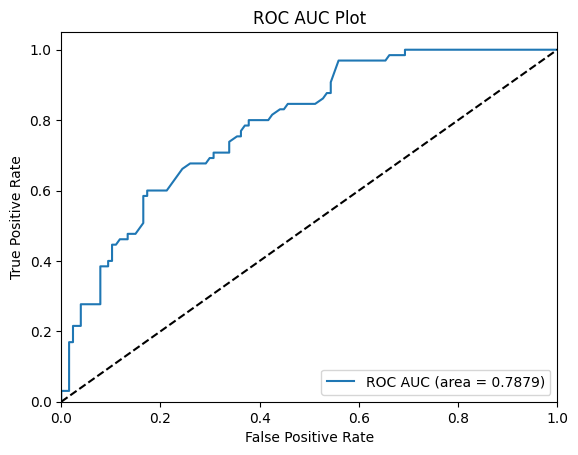

In [58]:
# Calculate ROC AUC score
y_prob = [probs[1] for probs in rf_clf.predict_proba(X_test)]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC AUC (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

#### **Hyper-Parameter Tuning for Random Forest Classifier**

VISUALIZATION OF THE TOP TREE:


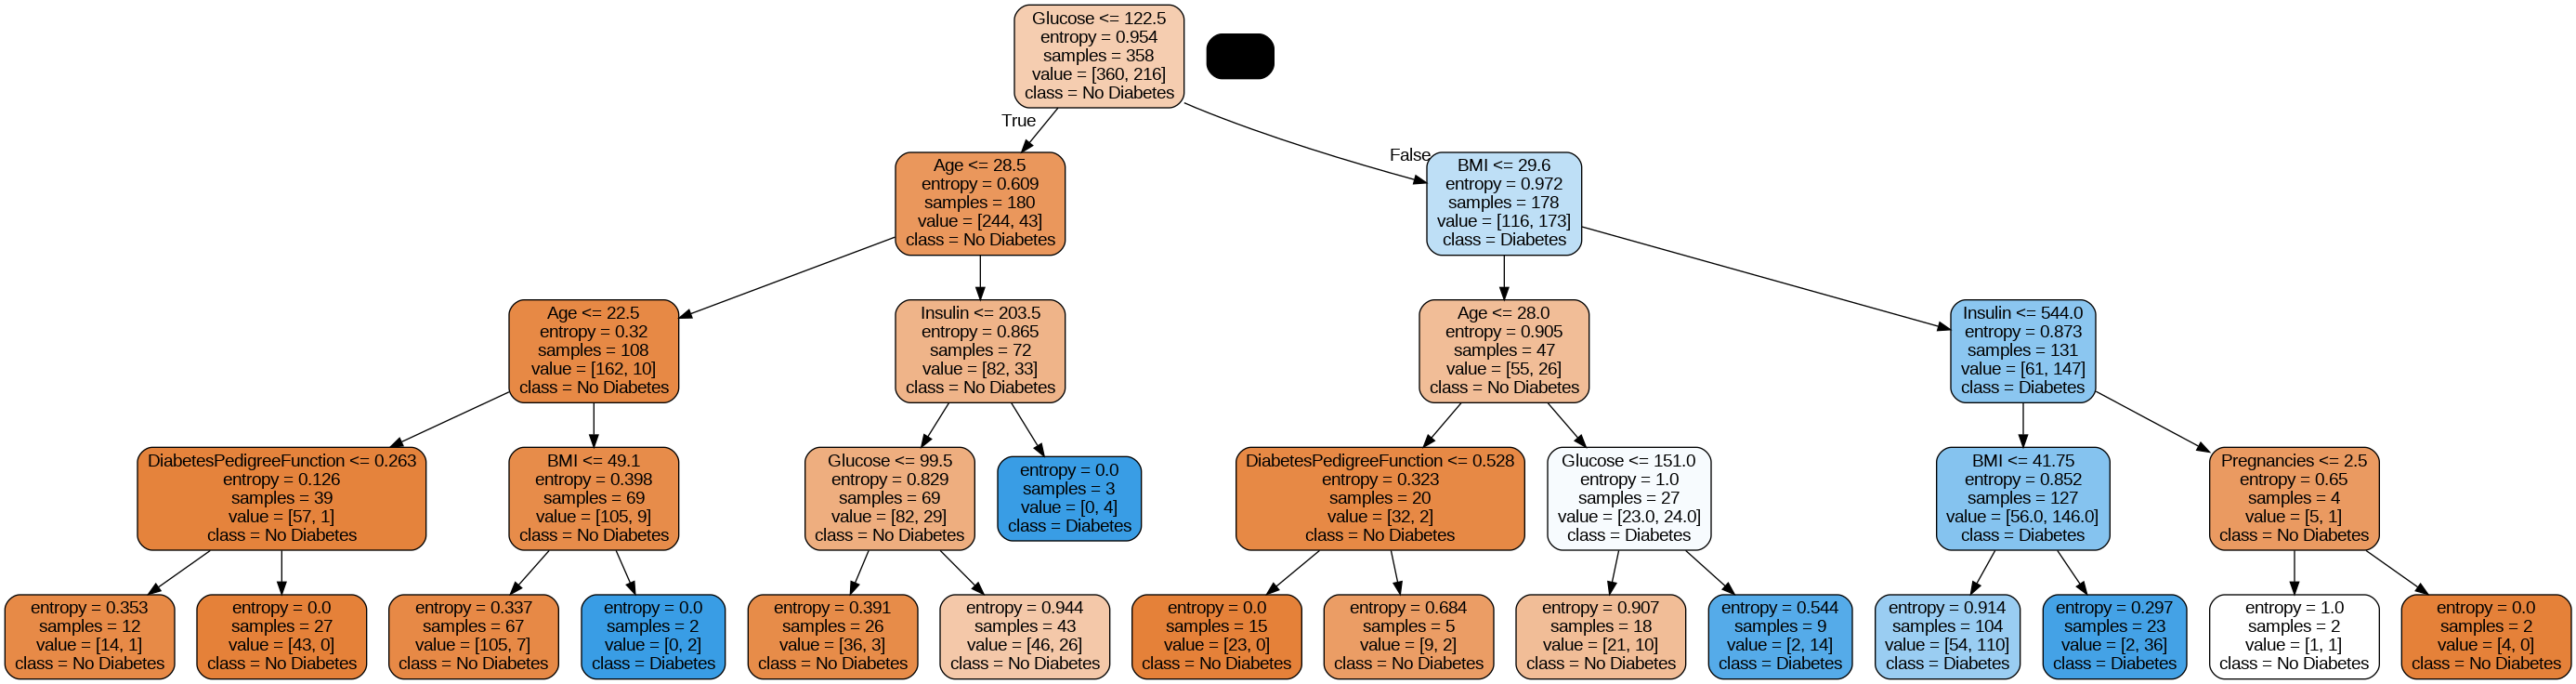

In [59]:
# Here is visualization of the top tree from random forest RF classifier
dot_data = export_graphviz(top_3_trees[0], out_file=None, feature_names=X.columns,
                           class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)

print("VISUALIZATION OF THE TOP TREE:")

# plot the top tree from RF using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)

# display the top tree
Image(graph.create_png())

In [68]:
# prompt: Make the deep learning model clearly show, using Karas, show the layers. Also, how to improve the AUROC?

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import roc_auc_score

# ... (Your existing code for data loading and preprocessing) ...

# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],))) # Input layer
model.add(Dropout(0.5)) # Dropout for regularization
model.add(Dense(64, activation='relu')) # Hidden layer
model.add(Dropout(0.3)) # Dropout for regularization
model.add(Dense(32, activation='relu')) # Hidden layer
model.add(Dense(1, activation='sigmoid')) # Output layer (sigmoid for binary classification)


model.summary() # This will show the model architecture


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to class labels


# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc}")

# ... (Your existing code for evaluation metrics and visualization) ...


#Improving AUROC
#1. Hyperparameter Tuning: Experiment with different optimizers (e.g., 'rmsprop', 'sgd'),
# learning rates, batch sizes, and numbers of epochs. Use Keras Tuner or scikit-learn's GridSearchCV/RandomizedSearchCV.

#2. Regularization: Add more Dropout layers or use L1/L2 regularization in the Dense layers
# to prevent overfitting, which can boost generalization and AUROC.

#3. Data Augmentation: If possible, generate synthetic data points to increase the size
# and diversity of your training set.  This may not be suitable for all datasets.

#4. Feature Engineering:  Explore creating new features or transformations of existing ones
# that might better capture the relationship between inputs and the outcome.

#5. Model Architecture: Experiment with different numbers of layers and nodes in each layer.
# Consider trying different activation functions.

#6. Class Weights:  If your classes are imbalanced, use class weights to give more importance to the minority class
# during training.  Example:
#class_weights = {0: 1, 1: 2} # Example, give class 1 twice the weight
#model.fit(X_train, y_train, class_weight=class_weights)


#7. Early Stopping: Implement early stopping to prevent overfitting.  Monitor validation AUROC
# and stop training when it plateaus or starts decreasing.  Example:
#from tensorflow.keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_auc', patience=10, restore_best_weights=True)
#model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping]) # Increase epochs since we are stopping early

#Example of hyperparameter search using keras tuner:
#import kerastuner as kt
#def build_model(hp):
#  model = keras.Sequential()
#  model.add(keras.layers.Dense(units=hp.Int('units',min_value=32,max_value=512,step=32),activation='relu',input_shape=(X_train.shape[1],)))
#  model.add(keras.layers.Dense(1,activation='sigmoid'))
#  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
#              loss='binary_crossentropy', metrics=['AUC'])
#  return model

#tuner = kt.Hyperband(build_model, objective='val_AUC',max_epochs=10,factor=3,directory='my_dir',project_name='intro_to_kt')
#tuner.search(X_train, y_train, epochs=10, validation_split=0.2)
#best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
#print(f"Optimal number of units in the first densely-connected layer: {best_hps.get('units')}")
#print(f"Optimal learning rate for the optimizer: {best_hps.get('learning_rate')}")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.5293 - loss: 7.5090 - val_accuracy: 0.6466 - val_loss: 1.9379
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4890 - loss: 5.4050 - val_accuracy: 0.6379 - val_loss: 2.2761
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5919 - loss: 3.3154 - val_accuracy: 0.5862 - val_loss: 1.5285
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5634 - loss: 2.1120 - val_accuracy: 0.5086 - val_loss: 0.8408
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4983 - loss: 2.6470 - val_accuracy: 0.5259 - val_loss: 1.0950
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5723 - loss: 1.9939 - val_accuracy: 0.4397 - val_loss: 0.8561
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5334 - loss: 1.4566 - val_accuracy: 0.4397 - val_loss: 0.8251
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5497 - loss: 1.5720 - val_accuracy: 0.4052 - val_los

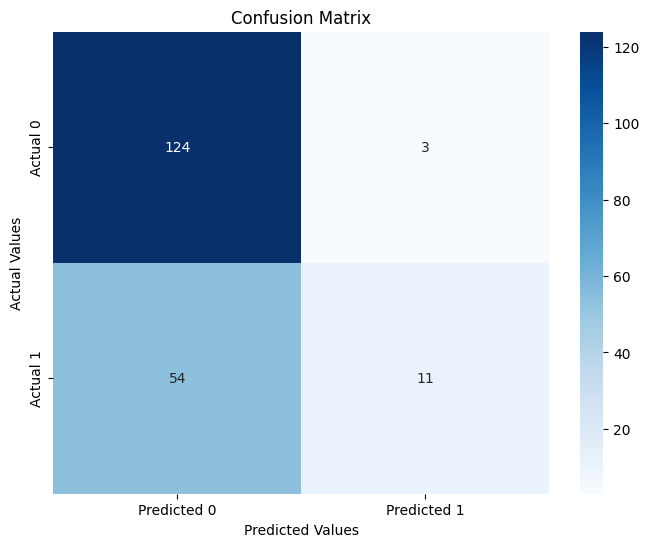

In [69]:
# prompt: report the confusion matrix, visualize it using seaborn, blue

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from your model's predictions
# Example:
# y_pred = rf_clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


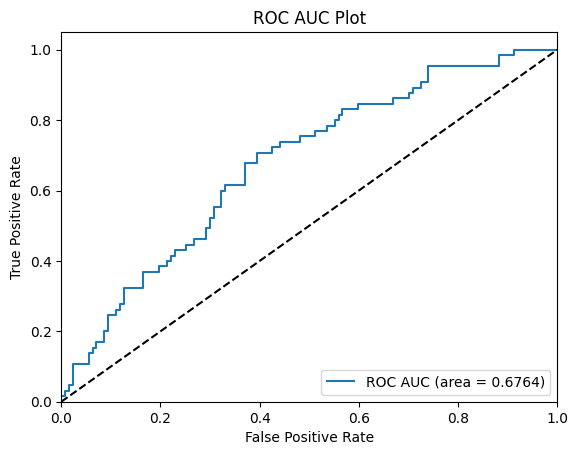

In [70]:
# prompt: draw the ROC

import matplotlib.pyplot as plt
# Assuming y_test and y_prob are already defined from your model's predict_proba

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC AUC (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()
